# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [ ]:
# TODO: Begin your EDA
...

In [4]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


### Q1 Answers

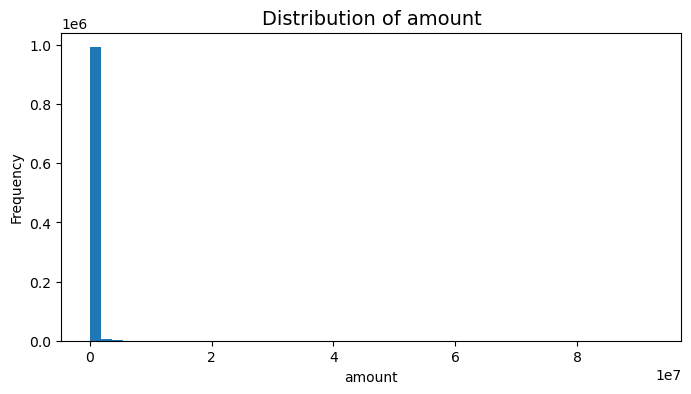

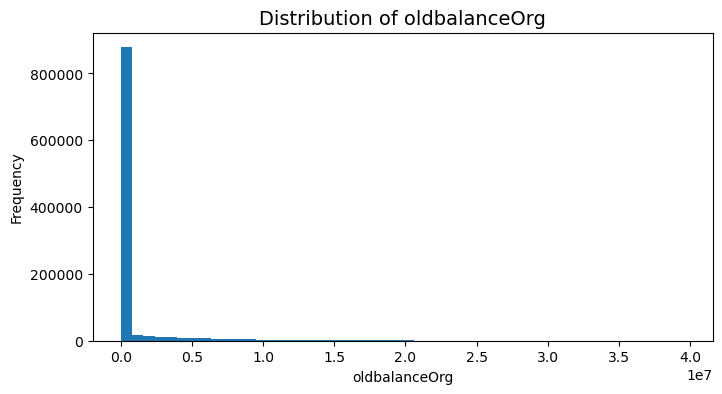

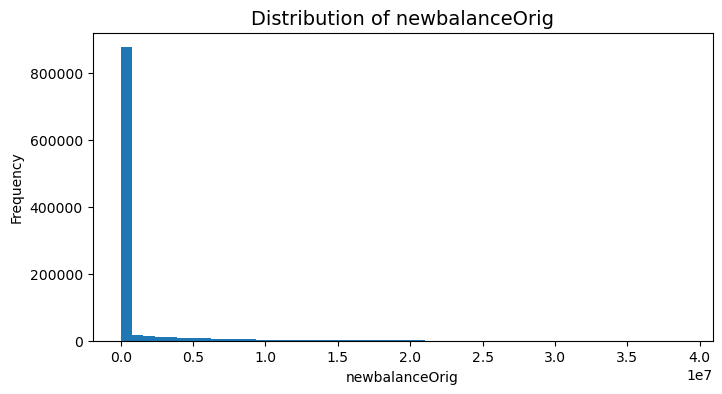

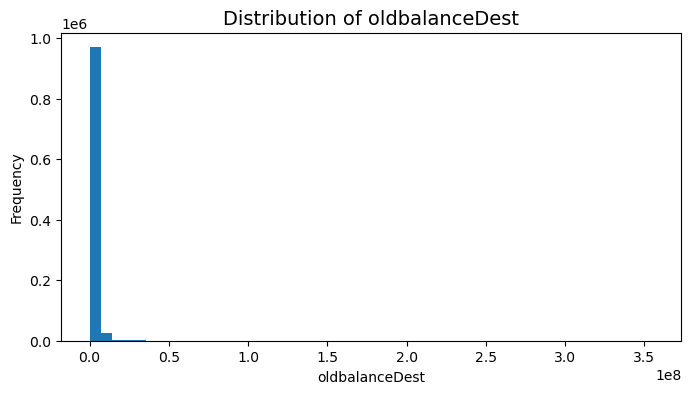

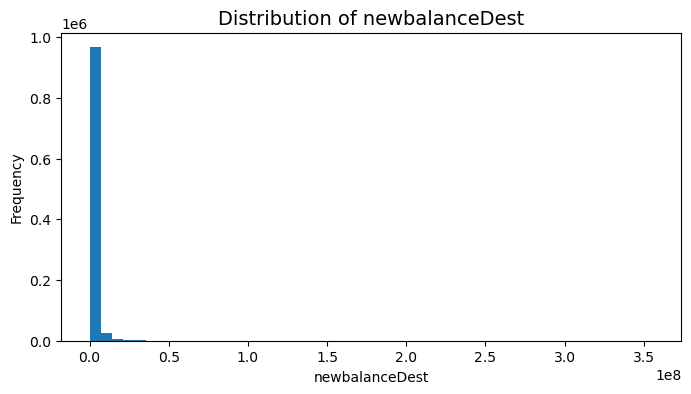

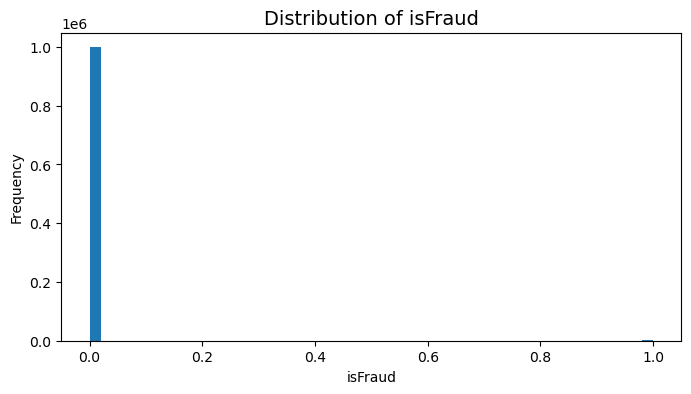

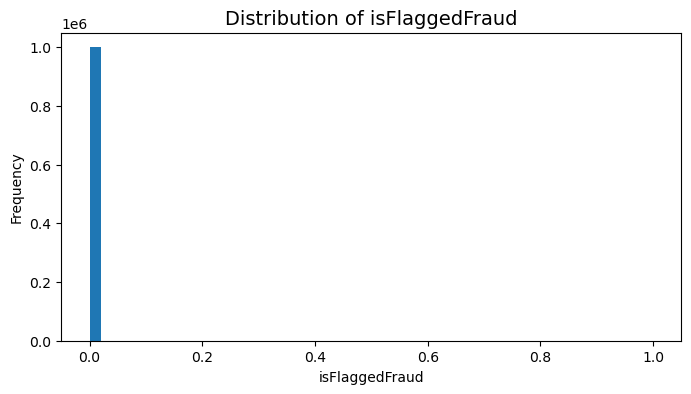

In [ ]:
for column in transactions.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    plt.hist(transactions[column], bins=50)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

Most of the numeric values in the dataset—like amount, oldbalanceOrg, newbalanceOrig, and the others—are heavily concentrated near zero. This means that the majority of transactions are small and involve low account balances. But there are a few transactions with very high values, which appear as rare outliers.

Most people are sending or receiving small amounts.

A few unusual transactions involve very large balances or amounts, which could be suspicious or fraudulent. It tells us that fraud detection should focus on those rare, high-value transactions that don’t follow normal patterns.

### Q2 Answers

Text(0.5, 1.0, 'Amount vs Old Balance')

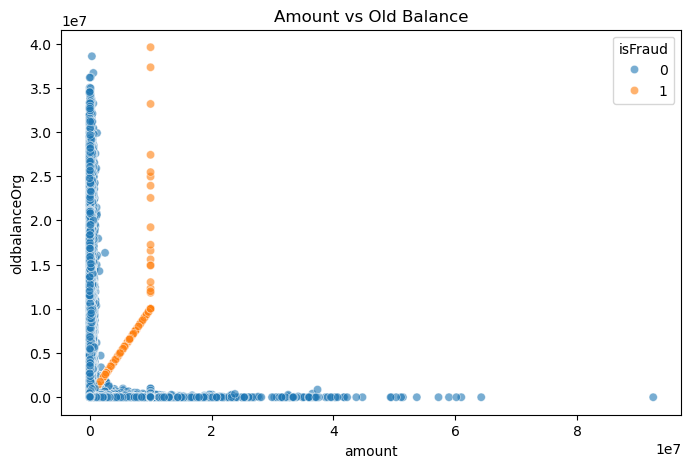

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='amount', y='oldbalanceOrg', hue='isFraud', alpha=0.6)
plt.title('Amount vs Old Balance')

Most non-fraud transactions (blue) are clustered near the left and bottom which means most legit transactions involve small amounts and low balances. Some blue dots are scattered farther out, showing a few large but legitimate transactions.

Fraudulent transactions (orange) are more structured and they form a diagonal pattern which suggests a direct relationship. It tell us that the amount being taken is equal to or close to the oldbalanceOrg.

Overall, fraudulent transactions tend to occur when the origin account had a high balance and the entire or a large part of the balance is being transferred. Normal transactions are more varied and tend to involve smaller portions of the account balance.

Text(0.5, 1.0, 'Old Balance vs New Balance (Origin)')

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


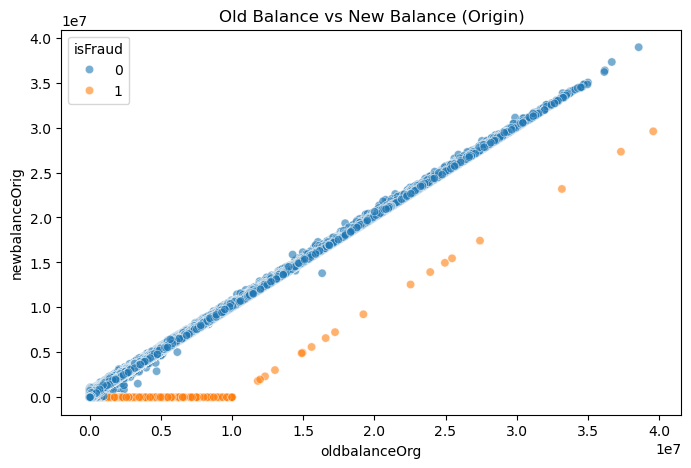

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', alpha=0.6)
plt.title('Old Balance vs New Balance (Origin)')

Normal transactions follow predictable patterns where blue points fall along the diagonal line. It shows that normal transactions reduce the balance correctly where everything looks clean.

Fraudulent transactions often empties the account which makes the new balance zero. Points that are away from the blue cluster also shows that large amount is taken out.

Text(0.5, 1.0, 'Old Balance vs New Balance (Destination)')

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


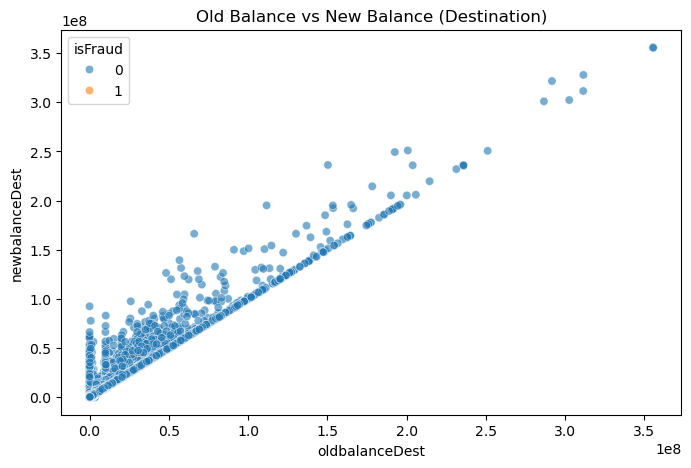

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='oldbalanceDest', y='newbalanceDest', hue='isFraud', alpha=0.6)
plt.title('Old Balance vs New Balance (Destination)')

All Points Are Blue which might suggest that most transactions going into destination accounts are legitimate since legitimate transactions follow a diagonal trend, meaning newbalanceDest equal to oldbalanceDest + amount.

It also more likely to mean that fraudulent transactions don’t always update the destination balance or frauds go to accounts that weren’t tracked properly, leaving newbalanceDest unchanged or missing.

Text(0.5, 1.0, 'Amount vs New Balance (Destination)')

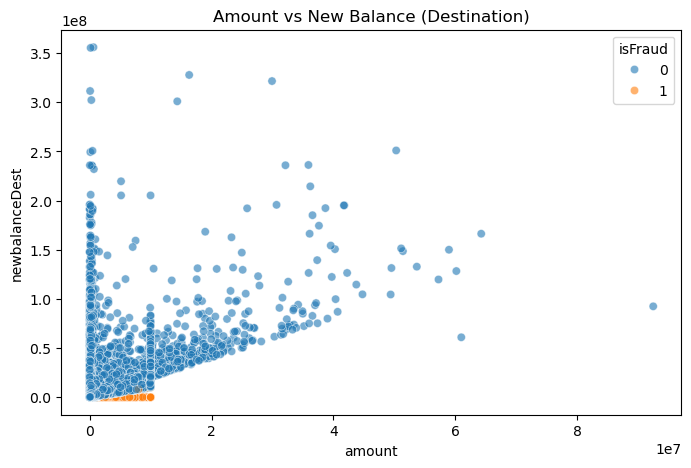

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='amount', y='newbalanceDest', hue='isFraud', alpha=0.6)
plt.title('Amount vs New Balance (Destination)')

There is no clear pattern for normal transactions, it mostly scattered widely, with many destination accounts receiving large or small amounts. 

It shows that fraudulent transactions often appear where A small amount is transferred which might be due to destination account not being actually updated.


Text(0.5, 1.0, 'Amount vs Old Balance (Destination)')

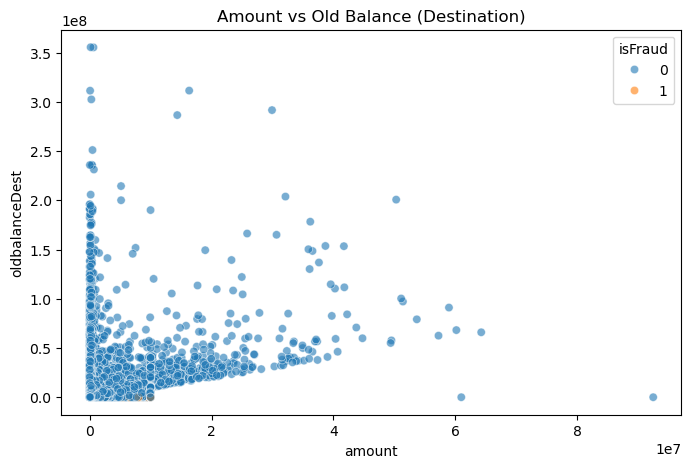

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x='amount', y='oldbalanceDest', hue='isFraud', alpha=0.6)
plt.title('Amount vs Old Balance (Destination)')

newbalanceDest and oldbalanceDest are not reliable for coming to conclusion for the fraudulent transactions since it's not updated for the  fraudulent transactions or the destination accounts are not tracked properly, leaving newbalanceDest and oldbalanceDest unchanged or missing.

### Q3 Answer

In [35]:
transactions.groupby('type')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


Trasfer have the highest average amount which is 911,827. This type is typically used for large money transfers, often between accounts or to external parties. It also have high standard diviation which suggests a mix of both normal and possibly fraudulent transactions.

CASH_OUT have the second highest average amount which is 175,584. It often used to withdraw money but it's still large for it which suspicious.

CASH_IN is close to CASH_OUT and it used to depositing large sums.

PAYMENT have much lower amount which is average of 13,056 which likely used for everyday payments.

DEBIT is Lowest average amount which is 5,446. It might have used for small-scale transactions, like debit card purchases.



### Q4 Answers

In [39]:
summary = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()
summary

,type,isFraud,amount
0,CASH_IN,0,1.689289e+05
1,CASH_OUT,0,1.734277e+05
2,CASH_OUT,1,1.326971e+06
3,DEBIT,0,5.445891e+03
4,PAYMENT,0,1.305559e+04
5,TRANSFER,0,9.081874e+05
6,TRANSFER,1,1.384176e+06


Yes, transaction amounts vary between fraudulent and non-fraudulent transactions across different transaction types. 

TRANSFER's non-fraud average is $908,000 when froud average is 1.38 million which shows fraudulent transfers involve much larger amounts. It also suggests fraudsters often use transfers to move large sums quickly.

CASH_OUT's non-fraud average is $173,000 when fraud Average is 1.33 million. Just like transfers, cashing out involve fraudulently removing huge amounts of money from accounts.

CASH_IN, PAYMENT, DEBIT types only appear in non-fraud cases which means these are just routine transactions, less likely to be exploited for fraud.

Overall, Fraudsters mainly use TRANSFER and CASH_OUT types and they go for large amounts which confirmed by TRANSFER's froud average, 1.38 million, and CASH_OUT's fraud Average, 1.33 million. 

CASH_IN, PAYMENT, and DEBIT only appear with isFraud = 0 which mean they don’t have any fraudulent transactions in the dataset.


## Q5 Answers

In [44]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [45]:
transactions.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')


,isFraud,isFlaggedFraud,count
0,0,0,998703
1,1,0,1296
2,1,1,1


The system correctly ignores most normal transactions. But it misses nearly all fraud since out of 1,297 fraud cases, only 1 was flagged.

This suggests the isFlaggedFraud is highly ineffective. It rarely flags transactions since it good at avoiding false alarms, but bad at catching fraud.

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### All questions answered above the visualizations

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.



### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here